<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Supervised Learning - Linear Regression - Miles per Gallon

---

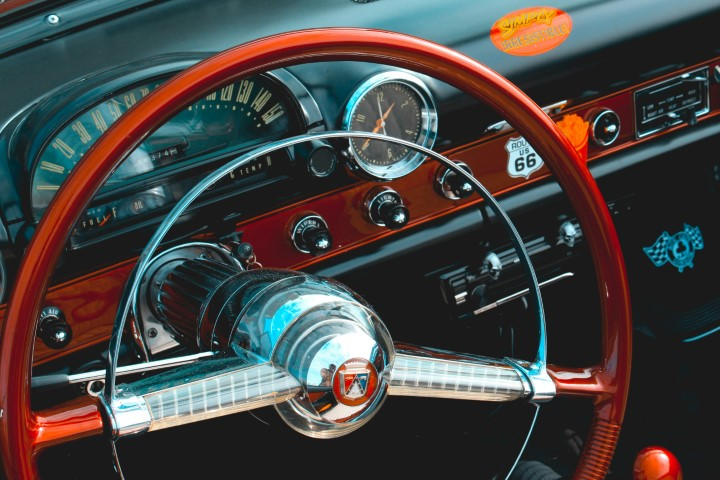

Foto von <a href="https://unsplash.com/de/@martye?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Eric Marty</a> auf <a href="https://unsplash.com/de/fotos/rotes-lenkrad-MsVZcS1r_ng?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>
  

# **0  | Install & Import**
***

In [ ]:
# Install


In [ ]:
# Import
import pandas as pd
from pandas import read_csv, DataFrame

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.feature_selection import f_regression

import plotly.express as px
import plotly.subplots as sp

from yellowbrick.regressor import residuals_plot, prediction_error
from yellowbrick.model_selection import feature_importances

In [ ]:
# Warnung ausstellen
import warnings

warnings.filterwarnings("ignore")

# **1  | Understand**
***


<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Aufgabe verstehen</br>
✅ Daten sammeln</br>
✅ Statistische Analyse (Min, Max, Mean, Korrelation, ...)</br>
✅ Datenvisualisierung (Streudiagramm, Box-Plot, ...)</br>
✅ Prepare Schritte festlegen</br>

<p><font color='black' size="5">
Anwendungsfall
</font></p>

---

Die Daten betreffen den Kraftstoffverbrauch im Stadtverkehr in Meilen pro Gallone, der anhand fünf kontinuierlichen Attributen vorhergesagt werden kann.



[DataSet](https://www.openml.org/search?type=data&status=active&id=42372)

[Info](https://archive.ics.uci.edu/dataset/9/auto+mpg)


In [ ]:
df = read_csv(
    "https://raw.githubusercontent.com/ralf-42/ML_Intro/main/02%20data/Auto-Mpg.csv",
    usecols=[
        "mpg",
        "cylinders",
        "displacement",
        "horsepower",
        "weight",
        "acceleration",
        "model year",
        "origin",
    ],
)
data = df.drop(columns=["mpg"])
target = df["mpg"]

<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Pandas
</font></p>

In [ ]:
data.info()

In [ ]:
data.describe().T

# **2 |  Prepare**

---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Nicht benötigte Features löschen</br>
✅ Datentyp ermitteln/ändern</br>
✅ Duplikate ermitteln/löschen</br>
✅ Missing Values behandeln</br>
✅ Ausreißer behandeln</br>
✅ Kategorischer Features codieren</br>
✅ Numerischer Features skalieren</br>
✅ Feature-Engineering (neue Features schaffen)</br>
✅ Dimensionalität reduzieren</br>
✅ Resampling (Over-/Undersampling)</br>
✅ Pipeline erstellen/konfigurieren</br>
✅ Train-Test-Split durchführen</br>

Ungültige Angaben

In [ ]:
data = data[data.horsepower != "?"]

In [ ]:
data.horsepower = data.horsepower.astype(int)

In [ ]:
data.info()

In [ ]:
target = target[data.index]

<p><font color='black' size="5">
Train-Test-Set
</font></p>


In [ ]:
data_train, data_test, target_train, target_test = train_test_split(
    data, target, test_size=0.3, random_state=42
)

In [ ]:
data_train.shape, data_test.shape, target_train.shape, target_test.shape

# **3 |  Modeling**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Modellauswahl treffen</br>
✅ Pipeline erweitern/konfigurieren</br>
✅ Training durchführen</br>
✅ Hyperparameter Tuning</br>
✅ Cross-Valdiation</br>
✅ Bootstrapping</br>
✅ Regularization</br>

 <p><font color='black' size="5">
Modellauswahl & Training
</font></p>

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(data_train, target_train)

# **4 | Evaluate**
---


<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Prognose (Train, Test) erstellen</br>
✅ Modellgüte prüfen</br>
✅ Residuenanalyse erstellen</br>
✅ Feature Importance/Selektion prüfen</br>
✅ Robustheitstest erstellen</br>
✅ Modellinterpretation erstellen</br>
✅ Sensitivitätsanalyse erstellen</br>
✅ Kommunikation (Key Takeaways)</br>


<p><font color='black' size="5">
Prediction
</font></p>


In [ ]:
target_train_pred = model.predict(data_train)
target_test_pred = model.predict(data_test)

<p><font color='black' size="5">
Bestimmtheitsmass
</font></p>

In [ ]:
r2 = r2_score(target_train, target_train_pred)
print(f"Modell: {model} -- Train --- Bestimmtheitsmass: {r2:5.2f}")

In [ ]:
r2 = r2_score(target_test, target_test_pred)
print(f"Modell: {model} -- Test --- Bestimmtheitsmass: {r2:5.2f}")

<p><font color='black' size="5">
Mean Absolut Error
</font></p>

In [ ]:
mae = mean_absolute_error(target_test, target_test_pred)
print(f"Modell: {model} -- Test -- Mean Absolute Error: {mae:5.2f}")

In [ ]:
min(target_test), max(target_test)

<p><font color='black' size="5">
Aufbau Analysewürfel
</font></p>

In [ ]:
# Übernahme der Testdaten
cube = data_test.copy()
cube.reset_index(inplace=True)

# Übernahme Target real & predict
cube["real"] = DataFrame(target_test.values, columns=["real"])
cube["predict"] = DataFrame(target_test_pred, columns=["predict"])

<p><font color='black' size="5">
Visualisierung real vs predict
</font></p>

In [ ]:
# Boxplot
title_ = "Boxplot real vs predict"
px.box(cube[["real", "predict"]], title=title_, width=600, height=600)

In [ ]:
# Histogramm
title_ = "Histogramm Prices real vs predict"
fig = px.histogram(cube, x=["real", "predict"], nbins=10, title=title_)
fig.update_layout(barmode="group", bargap=0.2, width=800, height=600)
fig.show()

<p><font color='black' size="5">
Fehlerhafte Vorhersagen
</font></p>

In [ ]:
cube["abs_Abw%"] = abs((cube["real"] - cube["predict"]) / cube["real"] * 100)

In [ ]:
cube.describe().T

In [ ]:
# Histogramm
title_ = "Histogramm absolute Abweichung"
fig = px.histogram(cube, x=["abs_Abw%"], nbins=10, title=title_)
fig.update_layout(barmode="group", bargap=0.2, width=800, height=600)
fig.show()

In [ ]:
_ = residuals_plot(
    model,
    data_train,
    target_train,
    data_test,
    target_test,
    train_color="b",
    test_color="g",
)


<p><font color='black' size="5">
Feature Importance
</font></p>

In [ ]:
fscores, pvalues = f_regression(data_test, target_test)
for i in range(len(fscores)):
    print(
        f"Feature {i+1}: {data.columns[i]:15s} score = {fscores[i]:>10,.2f}, p-value = {pvalues[i]:.3f}"
    )

In [ ]:
import plotly.express as px

px.bar(x=fscores, y=data.columns, width=600, height=600).update_yaxes(
    categoryorder="total ascending"
)

# **5 | Deploy**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Modellexport und -speicherung</br>
✅ Abhängigkeiten und Umgebung</br>
✅ Sicherheit und Datenschutz</br>
✅ In die Produktion integrieren</br>
✅ Tests und Validierung</br>
✅ Dokumentation & Wartung</br>